# Estudi Gaussian Mixture

## Lectura fitxer students

In [41]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)

In [42]:
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)

In [43]:
X = df.drop('target', axis=1)
y = df['target']

## Aplicació model

### Utilització de totes les característiques
Fent 2 agrupacions per determinar si necessiten o no assitència mèdica. 

In [44]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [45]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_num_scaled = scaler.fit_transform(df)

In [46]:
n_grups = 2
model_gm = GaussianMixture(n_components=n_grups)
clusters = model_gm.fit_predict(X)

In [47]:
df_clustered = X.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,1
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,0
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,0
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,0


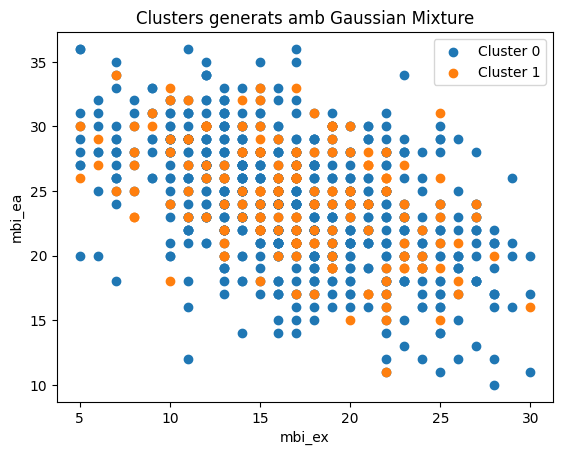

In [48]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [49]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               age      year       sex      glang      part       job  \
cluster                                                                 
0        22.137640  3.141854  1.692416   1.000000  0.580056  0.346910   
1        23.390805  2.942529  1.706897  68.862069  0.494253  0.356322   

            stud_h    health      psyt        jspe   qcae_cog   qcae_aff  \
cluster                                                                    
0        24.811798  3.782303  0.233146  106.658708  58.667135  35.078652   
1        27.241379  3.758621  0.189655  105.212644  57.948276  33.580460   

              amsp  erec_mean     mbi_ex     mbi_cy    mbi_ea  
cluster                                                        
0        23.198034   0.724552  16.835674  10.025281  24.16573  
1        22.954023   0.702107  17.051724  10.298851  24.37931  


In [50]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    712
1    174
dtype: int64

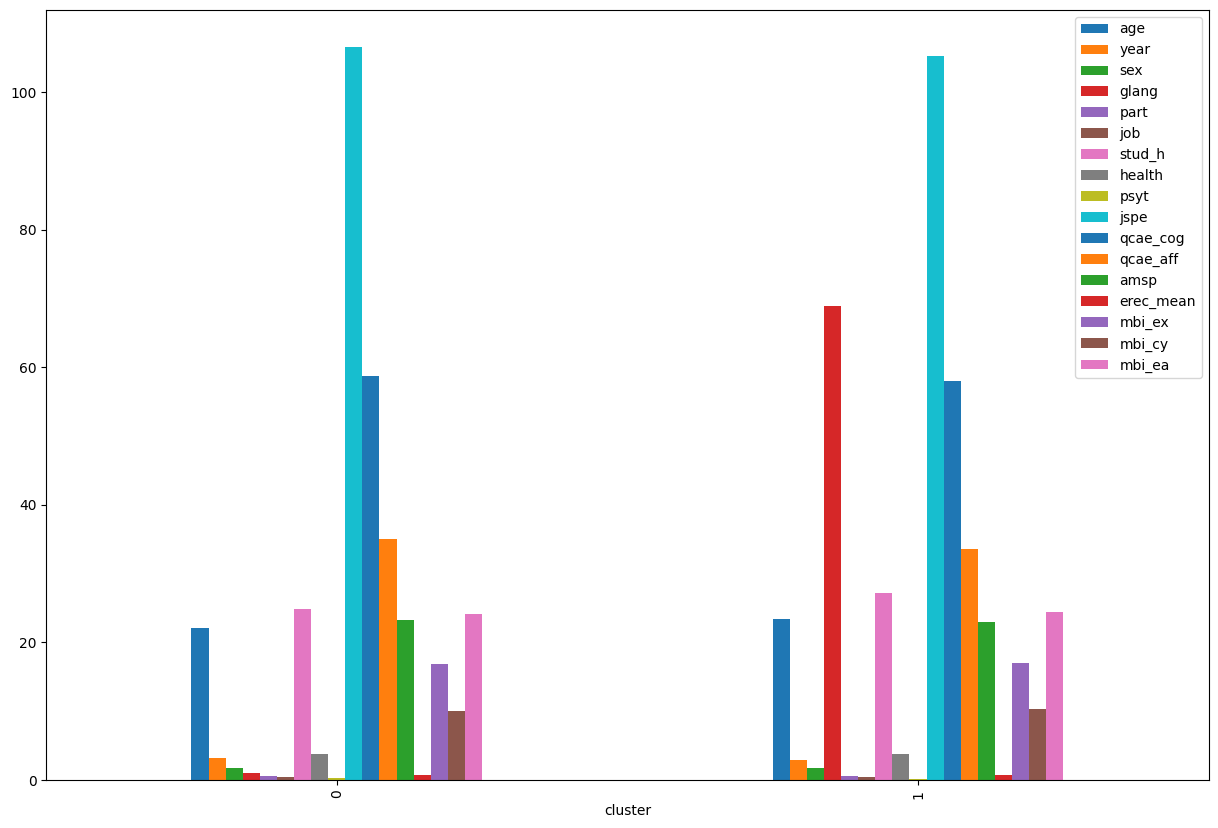

In [51]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

**Comentari**

Mirant els valors mitjans dels dos clústers generats i mirant la gràfica no podem arribar a un conclusió clara de les característiques de cada grup. És cert que veiem que la columna "glang" és un tret diferenciant. Però, què representa aquesta característica? La llengua que parlen els estudiants, que no sembla una tret determinant. Procedim a avaluar el model nosaltres mateixes, ja que les mesures com la precisió no ens proporciona informació de si les agrupacions efectuades són correctes per determinar si l'alumne té anisetat o depressió.

#### Avaluació model

Definim un _threshold_ per determinar a quin punt considerem que la persona en qüestió pateix ansietat o depressió, tenint en compte que la nostra _y_ és la suma de *escala de depressió* i *escala d'ansiestat*. Aquestes dues es mouen en l'interval:
* cesd: 0 a 56 
* stai_t: 20 a 77

In [52]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [56]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster,target
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,1,95
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0,40
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,0,98
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,0,65
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,23,4,34,0,80
882,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,17,5,24,0,67
883,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,15,8,31,0,59
884,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,22,15,19,0,91


In [57]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    136
1     43
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    712
1    174
dtype: int64


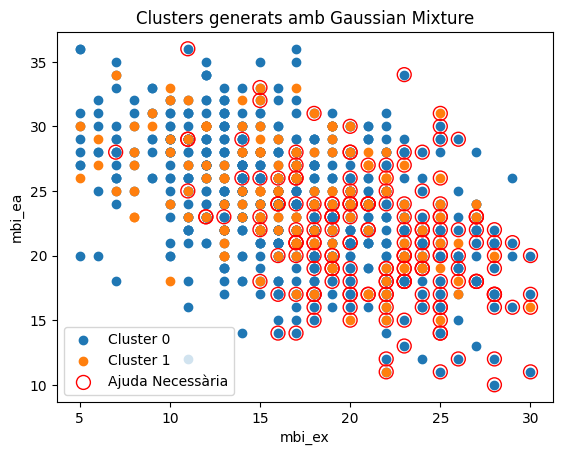

In [58]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_ea'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

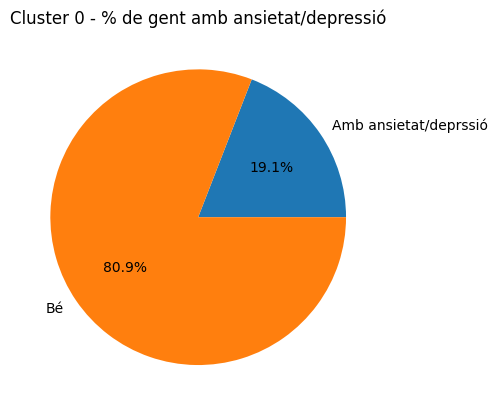

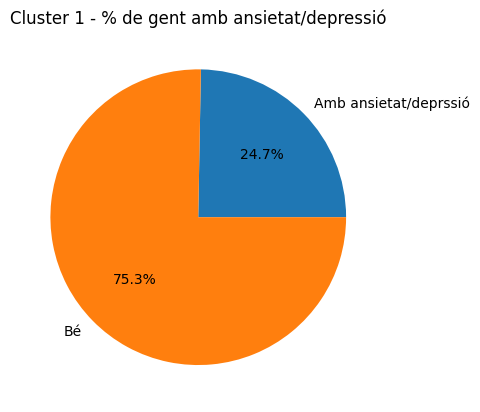

In [59]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

**Conclusions**

Considerant que el cluster 1 és el que hauria de tenir estudiants amb ansietat/depressió i veient els diagrames, podem assegurar que no estem obtenint una bona agrupació, ja que el percentatge de gent amb necessitat d'ajuda psicològica és gairebé igual en els dos clústers.

### Utilització de les característiques més rellevants
Fent 2 agrupacions per determinar si necessiten o no assitència mèdica. 

#### Random forest

Recordem que els coeficients amb Random Forest dels diferents atributs eren:

|    | atribut   | importancia |
|----|-----------|-------------|
| 9  | jspe      | 0.086444    |
| 10 | qcae_cog  | 0.084919    |
| 6  | stud_h    | 0.084754    |
| 11 | qcae_aff  | 0.082221    |
| 14 | mbi_ex    | 0.079569    |
| 12 | amsp      | 0.079371    |
| 13 | erec_mean | 0.078246    |
| 16 | mbi_ea    | 0.078138    |
| 15 | mbi_cy    | 0.073213    |
| 0  | age       | 0.067432    |
| 1  | year      | 0.048998    |
| 7  | health    | 0.041126    |
| 3  | glang     | 0.027404    |
| 4  | part      | 0.026077    |
| 5  | job       | 0.022708    |
| 2  | sex       | 0.021316    |
| 8  | psyt      | 0.018066    |

Per fer aquesta part ens quedarem els atributs que tenen l'importància major a **0.060000**

In [1]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [6]:
# X Random Forest
X_rf = X[['jspe', 'qcae_cog', 'stud_h', 'qcae_aff', 'mbi_ex', 'amsp', 'erec_mean', 'mbi_ea', 'mbi_cy', 'age']]

In [8]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_grups = 2
model_gm = GaussianMixture(n_components=n_grups)
clusters = model_gm.fit_predict(X_rf)

Exception in thread Thread-6:
Traceback (most recent call last):
  File "c:\Users\MLi\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\MLi\anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\MLi\anaconda3\lib\subprocess.py", line 1479, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\MLi\anaconda3\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\MLi\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\MLi\anaconda

In [9]:
df_clustered = X_rf.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster
0,88,62,56,27,17,17,0.738095,20,13,18,1
1,109,55,20,37,14,22,0.690476,26,11,26,1
2,106,64,36,39,24,17,0.690476,23,7,21,1
3,101,52,51,33,16,18,0.833333,21,10,21,1
4,102,58,22,28,22,21,0.690476,23,14,21,1


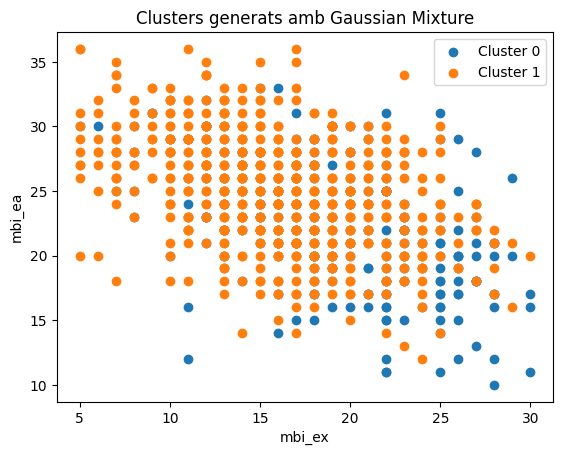

In [21]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [12]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               jspe   qcae_cog     stud_h   qcae_aff     mbi_ex       amsp  \
cluster                                                                      
0        109.120603  59.477387  20.336683  35.472362  19.703518  24.150754   
1        105.579330  58.250364  26.723435  34.585153  16.059680  22.860262   

         erec_mean     mbi_ea     mbi_cy        age  
cluster                                              
0         0.718114  21.869347  15.015075  24.939698  
1         0.720732  24.885007   8.649199  21.643377  


In [13]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    199
1    687
dtype: int64

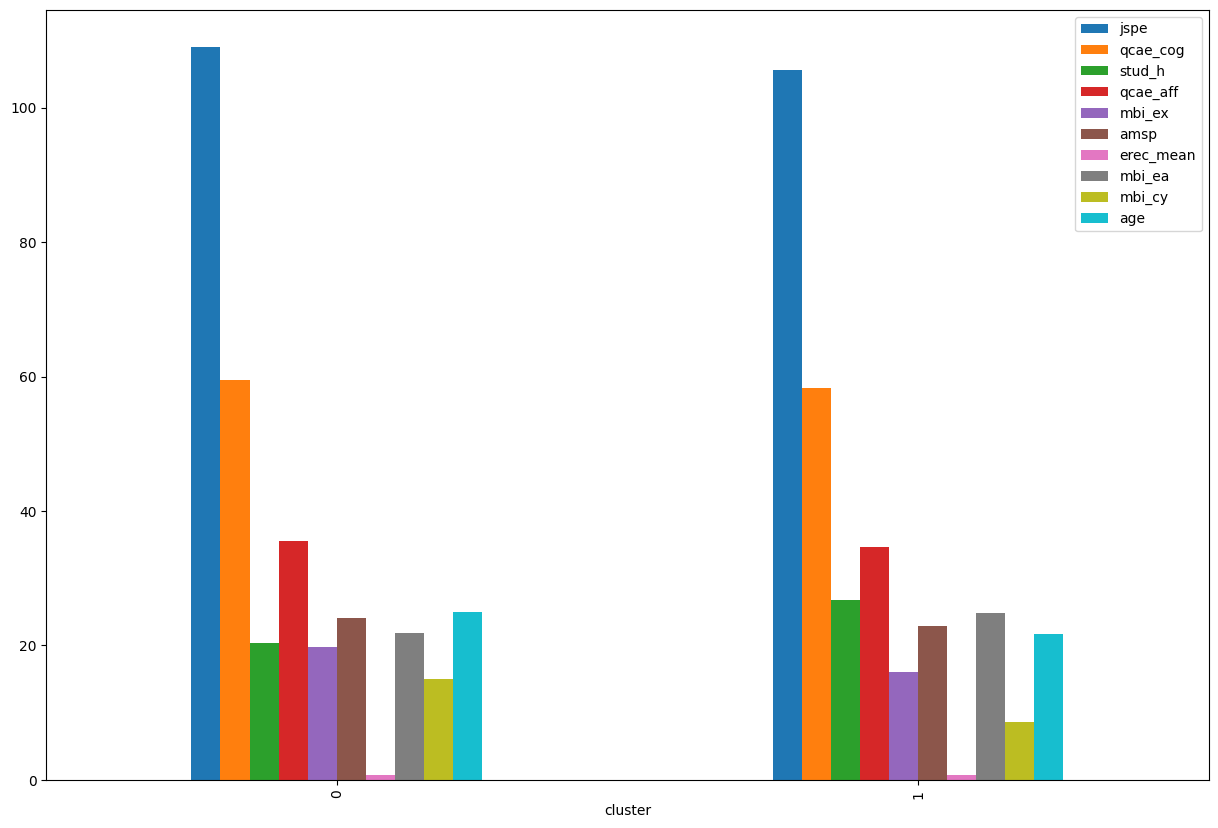

In [14]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [15]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [16]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster,target
0,88,62,56,27,17,17,0.738095,20,13,18,1,95
1,109,55,20,37,14,22,0.690476,26,11,26,1,40
2,106,64,36,39,24,17,0.690476,23,7,21,1,98
3,101,52,51,33,16,18,0.833333,21,10,21,1,65
4,102,58,22,28,22,21,0.690476,23,14,21,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...
881,106,63,45,39,23,28,0.619048,34,4,21,1,80
882,113,67,13,40,17,21,0.809524,24,5,20,1,67
883,100,50,50,31,15,24,0.547619,31,8,19,1,59
884,120,64,20,39,22,21,0.785714,19,15,24,0,91


In [18]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0     70
1    109
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    199
1    687
dtype: int64


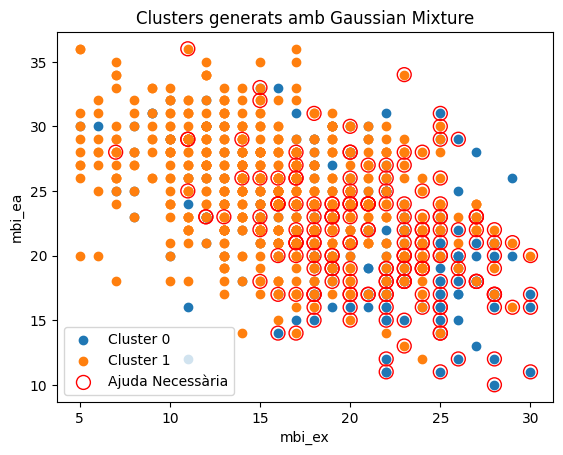

In [22]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_ea'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

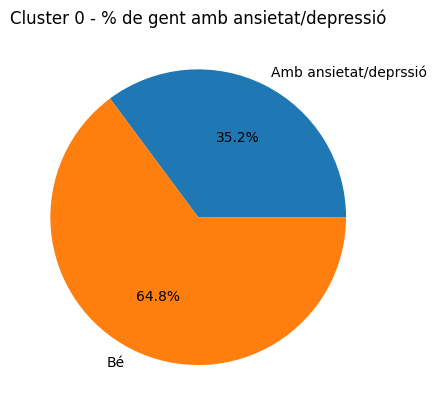

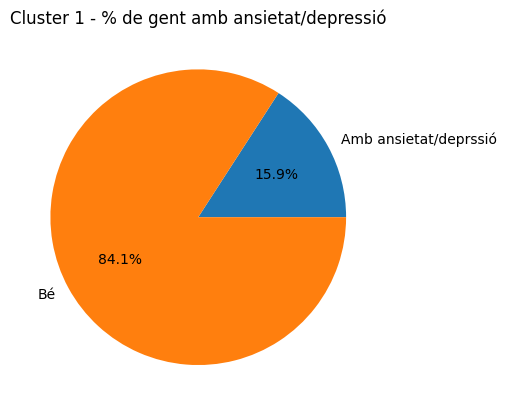

In [24]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

**Conclusions**

Quan hem utilitzat totes les característiques hem presuposat que el cluster 1 és el que hauria de tenir els estudiants amb necessitat d'ajuda psicològica. Recordem que teníem:
* Cluster 0: 19.1%
* Cluster 1: 24.7%

Ara un cop reduïdes les característiques gràcies a Random Forest, les agrupacions obtingudes tenen una mica més de diferència pel que fa el percentatge de gent amb ansietat/depressió:
* Cluster 0: 35.2%
* Cluster 1: 15.9%

De manera que ara el cluster 0 seria el que conté els estudiants amb necessitat d'ajuda psicològica.

Notem que reduint les característiques hem obtingut una millora pel que fa l'agrupació. Així, tornem a reduir el nombre de caracterísitques.

#### Random forest II

Recordem que els coeficients amb Random Forest dels atributs que hem tingut en compte abans:

|    | atribut   | importancia |
|----|-----------|-------------|
| 9  | jspe      | 0.086444    |
| 10 | qcae_cog  | 0.084919    |
| 6  | stud_h    | 0.084754    |
| 11 | qcae_aff  | 0.082221    |
| 14 | mbi_ex    | 0.079569    |
| 12 | amsp      | 0.079371    |
| 13 | erec_mean | 0.078246    |
| 16 | mbi_ea    | 0.078138    |
| 15 | mbi_cy    | 0.073213    |
| 0  | age       | 0.067432    |

Ara agafarem els atributs amb importància major a **0.080000**

In [132]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [133]:
# X Random Forest
X_rf = X[['jspe', 'qcae_cog', 'stud_h', 'qcae_aff']]

In [134]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_grups = 2
model_gm = GaussianMixture(n_components=n_grups)
clusters = model_gm.fit_predict(X_rf)

In [135]:
df_clustered = X_rf.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,jspe,qcae_cog,stud_h,qcae_aff,cluster
0,88,62,56,27,1
1,109,55,20,37,0
2,106,64,36,39,1
3,101,52,51,33,1
4,102,58,22,28,0


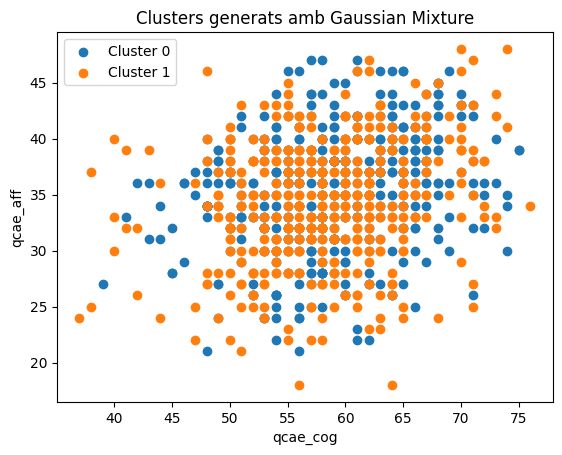

In [136]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['qcae_cog'], cluster_points['qcae_aff'], label=f'Cluster {i}')

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('qcae_cog')
plt.ylabel('qcae_aff')
plt.legend()
plt.show()

In [137]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               jspe   qcae_cog     stud_h   qcae_aff
cluster                                             
0        109.079254  58.827506  12.240093  35.300699
1        103.835886  58.242888  37.538293  34.299781


In [138]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    429
1    457
dtype: int64

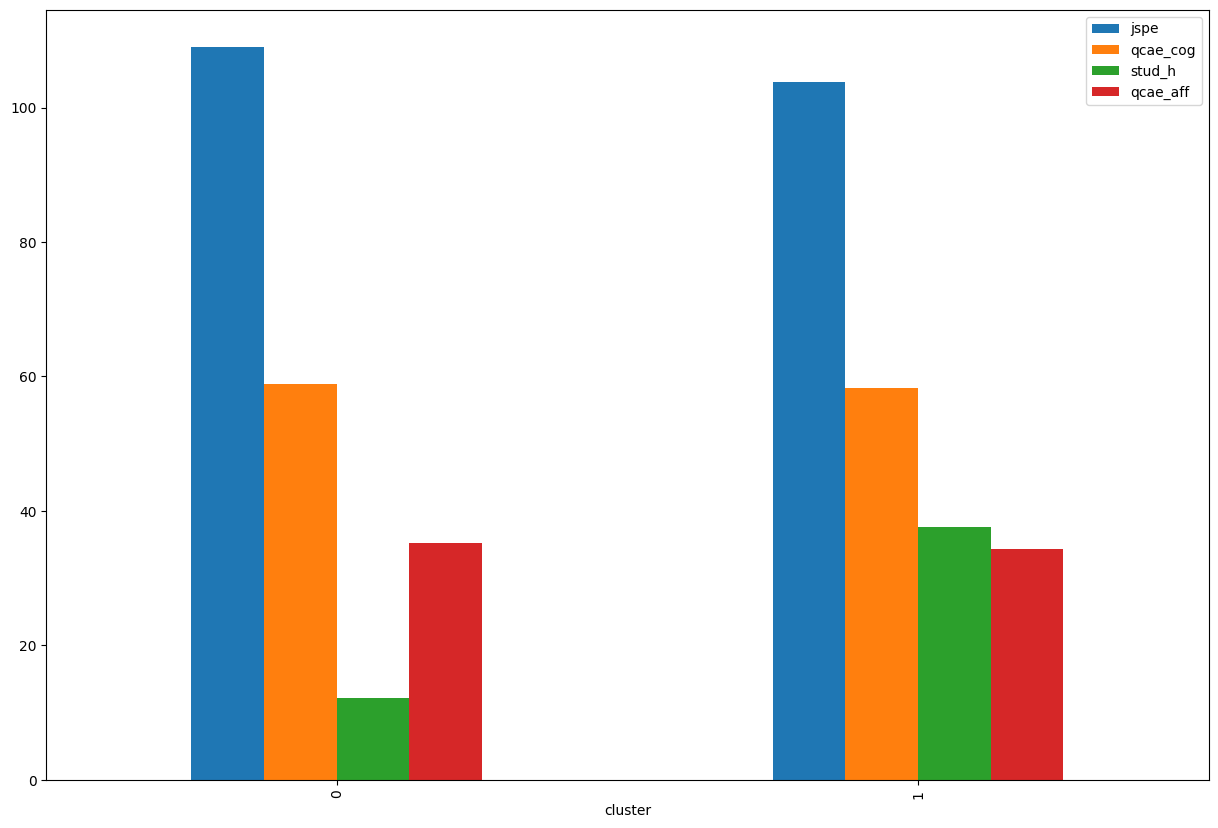

In [139]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [140]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [141]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,jspe,qcae_cog,stud_h,qcae_aff,cluster,target
0,88,62,56,27,1,95
1,109,55,20,37,0,40
2,106,64,36,39,1,98
3,101,52,51,33,1,65
4,102,58,22,28,0,60
...,...,...,...,...,...,...
881,106,63,45,39,1,80
882,113,67,13,40,0,67
883,100,50,50,31,1,59
884,120,64,20,39,0,91


In [142]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0     69
1    110
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    429
1    457
dtype: int64


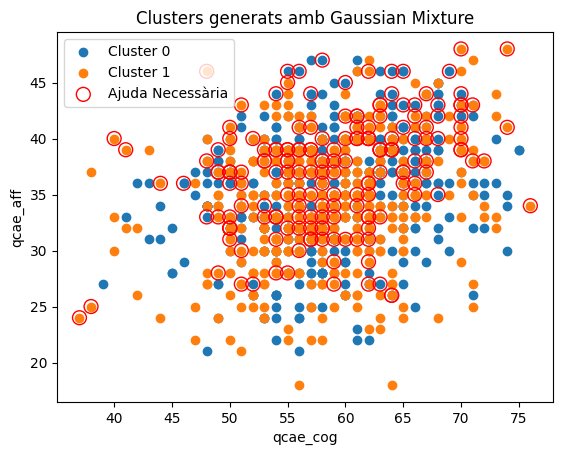

In [143]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['qcae_cog'], cluster_points['qcae_aff'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['qcae_cog'], df_target_gt_threshold['qcae_aff'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('qcae_cog')
plt.ylabel('qcae_aff')
plt.legend()
plt.show()

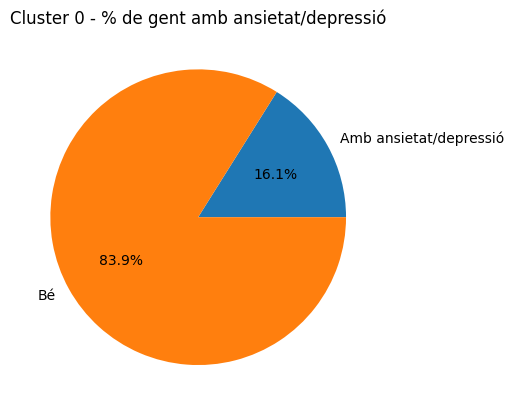

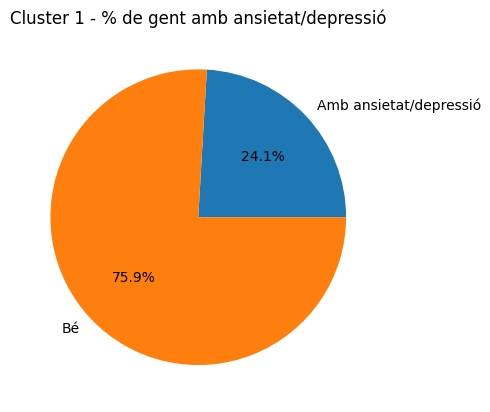

In [144]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

Quan hem reduït les característiques gràcies a Random Forest, els prcentatges de les agrupacions obtingudes eren:
* Cluster 0: 35.2%
* Cluster 1: 15.9%

Fent una altra reducció de característiques (fixant-nos amb la importància donada per Random Forest), obtenim:
* Cluster 0: 16.1%
* Cluster 1: 24.1%

Notem que no hem obtingut una millora. Per tant, continuem provant altres mètodes per triar la rellevància de les característiques.

#### Linear Regression

Ara en comptes de fer la redddució de característiques amb Random Forest, utilitzem els coeficients obtinguts després d'haver aplicat Linear Regression. 

Recordem que els coeficients amb Linear Regression dels diferents atributs eren:
|    | Feature   | Coefficient |
|----|-----------|-------------|
| 8  | psyt      | 7.979258    |
| 2  | sex       | 4.281193    |
| 13 | erec_mean | 2.110597    |
| 14 | mbi_ex    | 1.319494    |
| 11 | qcae_aff  | 0.742631    |
| 0  | age       | 0.380706    |
| 15 | mbi_cy    | 0.224846    |
| 6  | stud_h    | 0.124795    |
| 3  | glang     | 0.052498    |
| 10 | qcae_cog  | -0.039671   |
| 9  | jspe      | -0.168637   |
| 12 | amsp      | -0.382934   |
| 16 | mbi_ea    | -1.007413   |
| 1  | year      | -1.074211   |
| 5  | job       | -1.184904   |
| 4  | part      | -1.968074   |
| 7  | health    | -3.010553   |

Per fer aquesta part ens quedarem els atributs que tenen l'importància major a **0.100000**

In [25]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [26]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex', 'qcae_aff', 'age', 'mbi_cy', 'stud_h']]

In [27]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_grups = 2
model_gm = GaussianMixture(n_components=n_grups)
clusters = model_gm.fit_predict(X_lr)

In [28]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster
0,0,1,0.738095,17,27,18,13,56,0
1,0,1,0.690476,14,37,26,11,20,0
2,0,2,0.690476,24,39,21,7,36,0
3,0,2,0.833333,16,33,21,10,51,0
4,0,1,0.690476,22,28,21,14,22,0


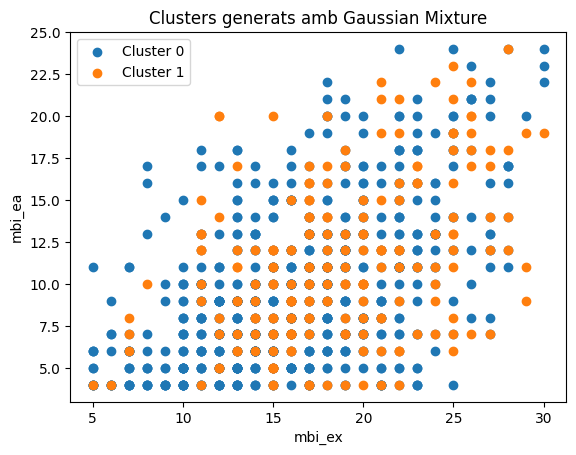

In [31]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

In [32]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

         psyt       sex  erec_mean     mbi_ex   qcae_aff        age  \
cluster                                                               
0         0.0  1.655022   0.719970  16.377001  34.427948  22.356623   
1         1.0  1.834171   0.720747  18.608040  36.015075  22.477387   

            mbi_cy     stud_h  
cluster                        
0         9.719068  25.572052  
1        11.321608  24.311558  


In [33]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    687
1    199
dtype: int64

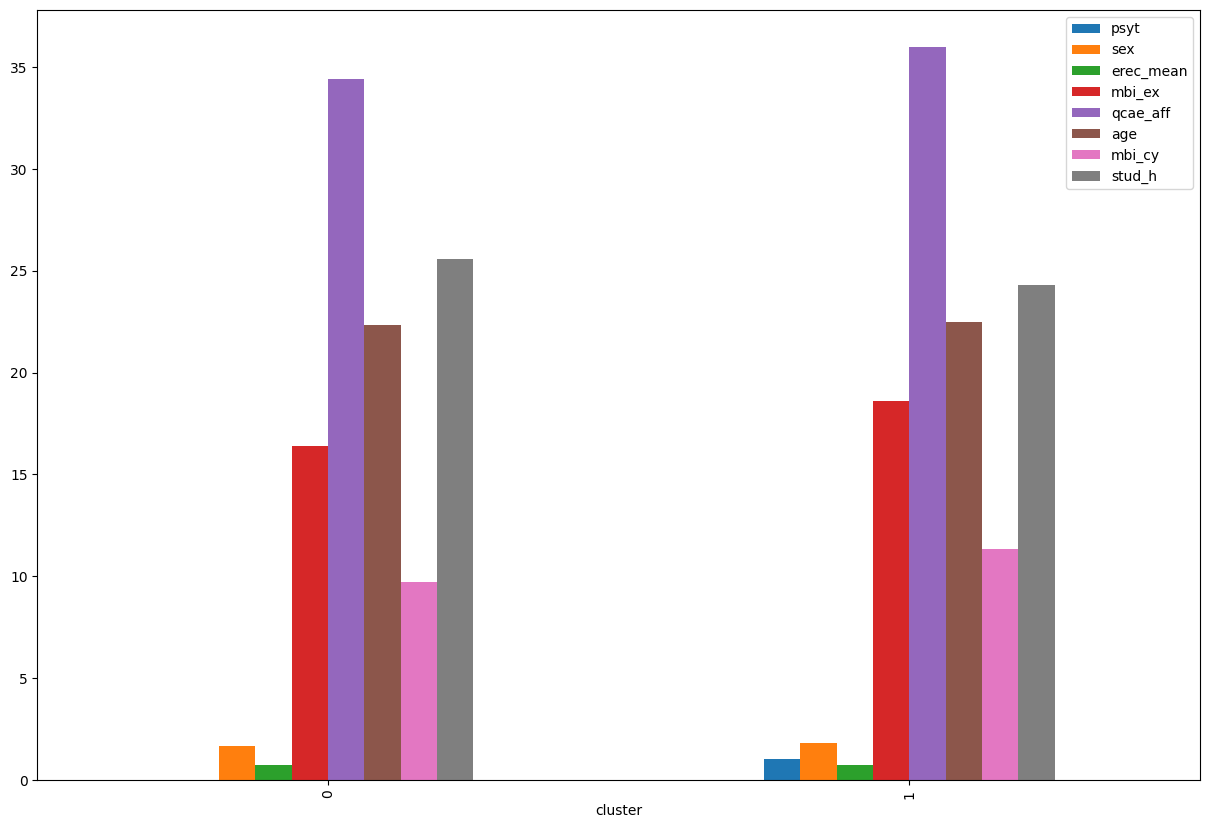

In [34]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [35]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [36]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster,target
0,0,1,0.738095,17,27,18,13,56,0,95
1,0,1,0.690476,14,37,26,11,20,0,40
2,0,2,0.690476,24,39,21,7,36,0,98
3,0,2,0.833333,16,33,21,10,51,0,65
4,0,1,0.690476,22,28,21,14,22,0,60
...,...,...,...,...,...,...,...,...,...,...
881,0,1,0.619048,23,39,21,4,45,0,80
882,0,2,0.809524,17,40,20,5,13,0,67
883,0,1,0.547619,15,31,19,8,50,0,59
884,1,2,0.785714,22,39,24,15,20,1,91


In [37]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    104
1     75
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    687
1    199
dtype: int64


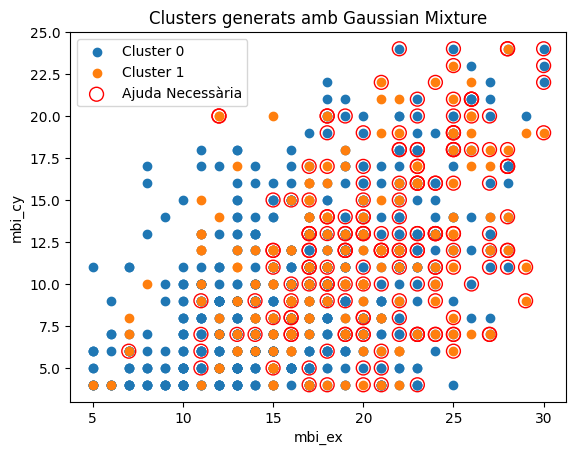

In [39]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_cy'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

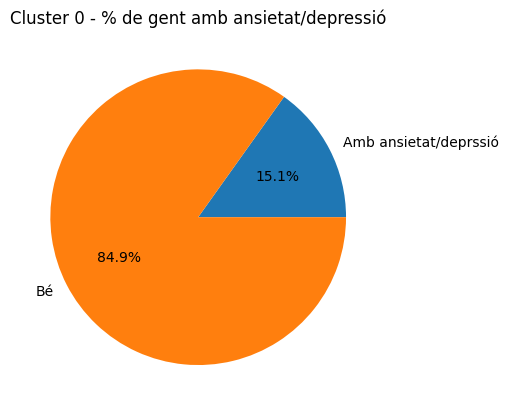

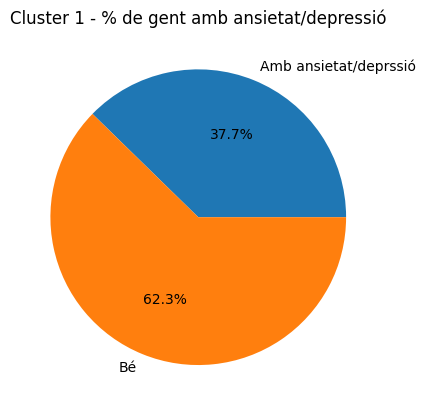

In [40]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

**Conclusions**

Quan hem reduït les característiques segons els coeficients de Random Forest, les agrupacions obtingudes tenien  el percentatge de gent amb ansietat/depressió:
* Cluster 0: 35.2%
* Cluster 1: 15.9%

Ara que hem tret certes característiques seguint els coeficients de la Regressió lineal, tenim:
* Cluster 0: 15.1%
* Cluster 1: 37.7%

Podem dir que no tenim una gran millora, és cert que el cluster 1 (abans 0) és el cluster que té més estudiants amb ansietat o depressió, s'augmenta una mica la proporció: de 35.2% a 37.7%

Per això, veiem la petita tendència de millora del nostre model, procedirem a tenir en compte menys característiques (amb el cirteri dels coeficients de Linear Regression).

#### Linear Regression II

Recordem que els coeficients amb Linear Regression dels atributs que hem tingut en compte abans:

|    | Feature   | Coefficient |
|----|-----------|-------------|
| 8  | psyt      | 7.979258    |
| 2  | sex       | 4.281193    |
| 13 | erec_mean | 2.110597    |
| 14 | mbi_ex    | 1.319494    |
| 11 | qcae_aff  | 0.742631    |
| 0  | age       | 0.380706    |
| 15 | mbi_cy    | 0.224846    |
| 6  | stud_h    | 0.124795    |

Ara ens quedarem els atributs que tenen l'importància major a **1.000000**

In [98]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [120]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex']]

In [121]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_grups = 2
model_gm = GaussianMixture(n_components=n_grups)
clusters = model_gm.fit_predict(X_lr)

In [122]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,cluster
0,0,1,0.738095,17,1
1,0,1,0.690476,14,1
2,0,2,0.690476,24,1
3,0,2,0.833333,16,1
4,0,1,0.690476,22,1


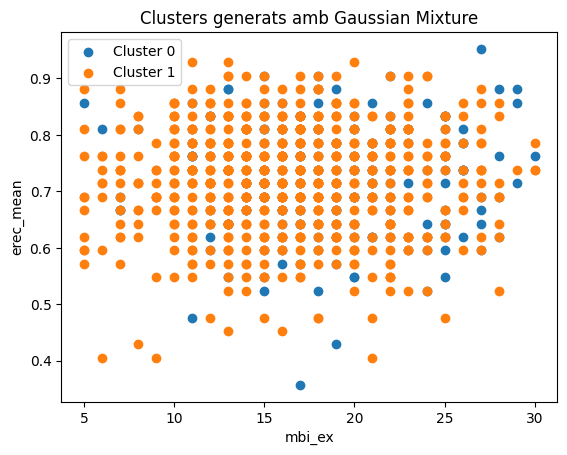

In [123]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

In [124]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

         psyt       sex  erec_mean     mbi_ex
cluster                                      
0         1.0  1.834171   0.720747  18.608040
1         0.0  1.655022   0.719970  16.377001


In [125]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    199
1    687
dtype: int64

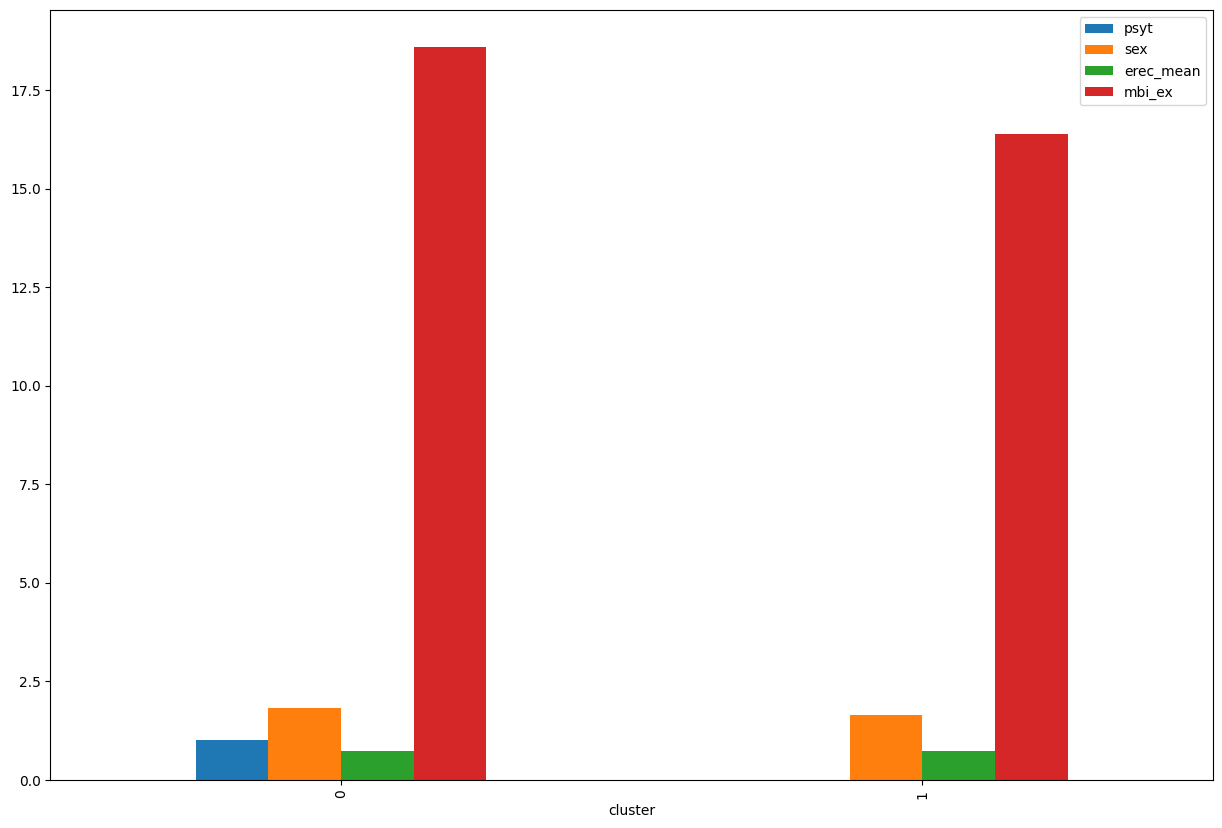

In [126]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [127]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [128]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,cluster,target
0,0,1,0.738095,17,1,95
1,0,1,0.690476,14,1,40
2,0,2,0.690476,24,1,98
3,0,2,0.833333,16,1,65
4,0,1,0.690476,22,1,60
...,...,...,...,...,...,...
881,0,1,0.619048,23,1,80
882,0,2,0.809524,17,1,67
883,0,1,0.547619,15,1,59
884,1,2,0.785714,22,0,91


In [129]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0     75
1    104
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    199
1    687
dtype: int64


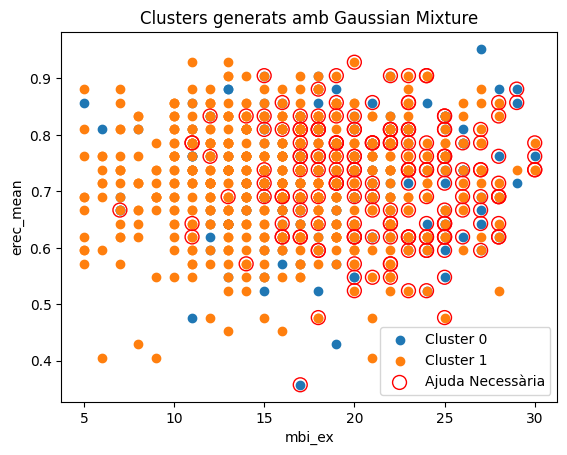

In [130]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['erec_mean'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

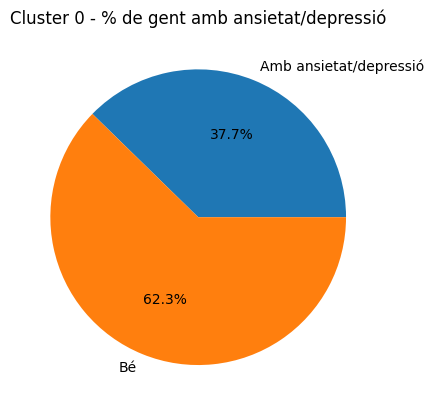

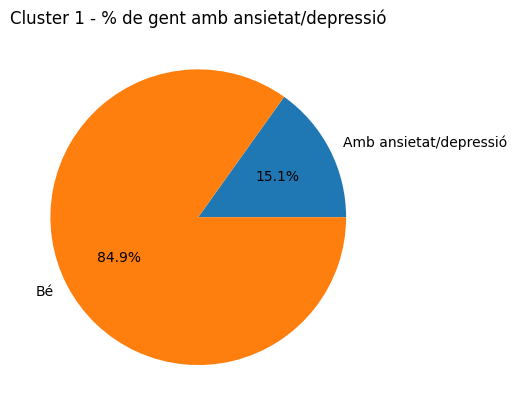

In [131]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

**Conclusions**

Quan hem reduït les característiques seguint els coeficients de la Regressió lineal, quedant-nos aquelles que són superiors a 0.1, tenim:
* Cluster 0: 15.1%
* Cluster 1: 37.7%

I quan fem el mateix procés, però amb les característiques amb coeficients majors a 1, aconseguim els mateixos resultats. Per tant, reduir més les característiques deixa de ser una via de millora. 

_No obstant, si clusteritzem amb més grups tindrem millors agrupacions?_

### Utilització de les característiques rellevants
Com a característiques rellevants fem servir aquelles que tenen coeficient major a **0.100000** amb LinearRegression.
* 'psyt'
* 'sex'
* 'erec_mean'
* 'mbi_ex'
* 'qcae_aff'
* 'age'
* 'mbi_cy'
* 'stud_h'

Fent 3 agrupacions per determinar si:
* necessiten assitència mèdica
* recomanable tenir assitència mèdica
* no necessiten assitència mèdica  

In [145]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [146]:
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex', 'qcae_aff', 'age', 'mbi_cy', 'stud_h']]

In [147]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_grups = 3
model_gm = GaussianMixture(n_components=n_grups)
clusters = model_gm.fit_predict(X_lr)

In [148]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster
0,0,1,0.738095,17,27,18,13,56,0
1,0,1,0.690476,14,37,26,11,20,0
2,0,2,0.690476,24,39,21,7,36,0
3,0,2,0.833333,16,33,21,10,51,0
4,0,1,0.690476,22,28,21,14,22,0


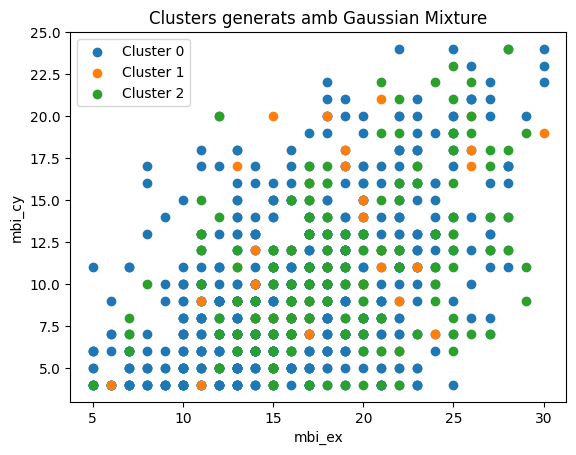

In [149]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

In [150]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

         psyt       sex  erec_mean     mbi_ex   qcae_aff        age  \
cluster                                                               
0         0.0  1.655022   0.719970  16.377001  34.427948  22.356623   
1         1.0  1.083333   0.724206  18.194444  33.722222  23.833333   
2         1.0  2.000000   0.719982  18.699387  36.521472  22.177914   

            mbi_cy     stud_h  
cluster                        
0         9.719068  25.572052  
1        12.166667  25.861111  
2        11.134969  23.969325  


In [151]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    687
1     36
2    163
dtype: int64

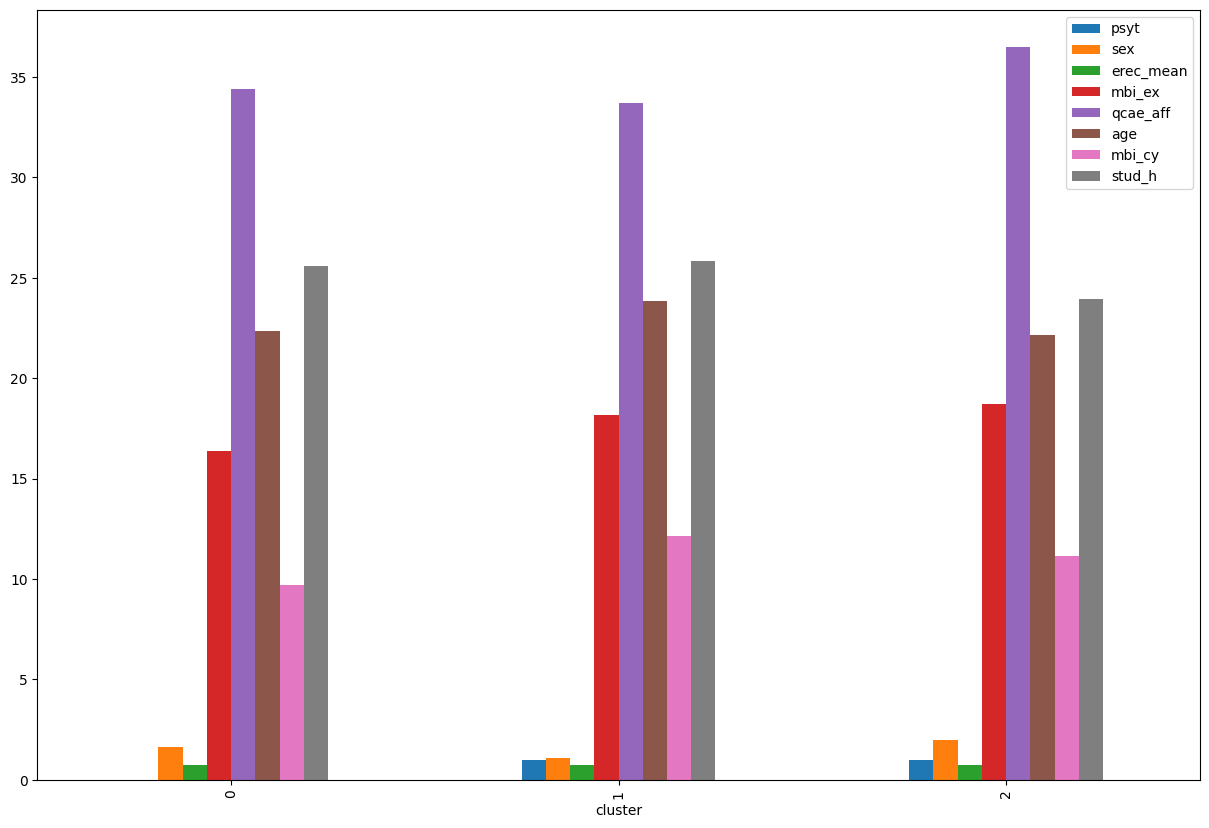

In [152]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

#### Avaluació model

In [153]:
cesd_max = 56
stai_t_max = 77
threshold1 = (cesd_max+stai_t_max)*0.33
print("threshold1", threshold1)
threshold2 = (cesd_max+stai_t_max)*0.66
print("threshold2", threshold2)

threshold1 43.89
threshold2 87.78


In [154]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster,target
0,0,1,0.738095,17,27,18,13,56,0,95
1,0,1,0.690476,14,37,26,11,20,0,40
2,0,2,0.690476,24,39,21,7,36,0,98
3,0,2,0.833333,16,33,21,10,51,0,65
4,0,1,0.690476,22,28,21,14,22,0,60
...,...,...,...,...,...,...,...,...,...,...
881,0,1,0.619048,23,39,21,4,45,0,80
882,0,2,0.809524,17,40,20,5,13,0,67
883,0,1,0.547619,15,31,19,8,50,0,59
884,1,2,0.785714,22,39,24,15,20,2,91


In [157]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold1 = df_aval[df_aval['target'] < threshold1]
df_target_gt_threshold2 = df_aval[(df_aval['target'] > threshold1) & (df_aval['target'] < threshold2)]
df_target_gt_threshold3 = df_aval[df_aval['target'] > threshold2]

# Fem el recompte agrupant per 'cluster'
count_by_cluster1 = df_target_gt_threshold1.groupby('cluster').size()
count_by_cluster2 = df_target_gt_threshold2.groupby('cluster').size()
count_by_cluster3 = df_target_gt_threshold3.groupby('cluster').size()

# Mostrem els resultats
print("Recompte estudiants que NO necessiten ajuda\n", count_by_cluster1)
print("\nRecompte estudiants recomanable rebre ajuda\n", count_by_cluster2)
print("\nRecompte estudiants que SÍ necessiten ajuda\n", count_by_cluster3)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que NO necessiten ajuda
 cluster
0    194
1      2
2     13
dtype: int64

Recompte estudiants recomanable rebre ajuda
 cluster
0    438
1     27
2    100
dtype: int64

Recompte estudiants que SÍ necessiten ajuda
 cluster
0    55
1     7
2    50
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    687
1     36
2    163
dtype: int64


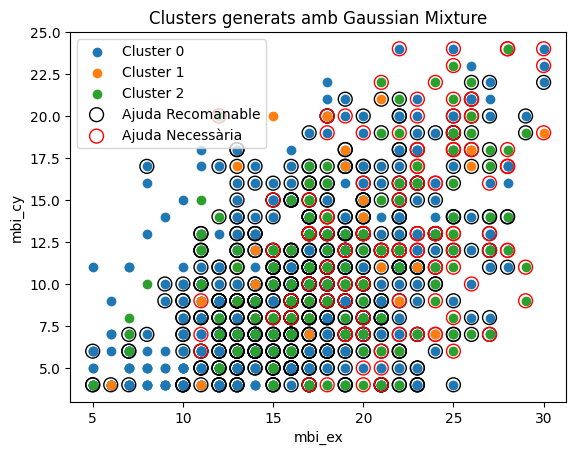

In [161]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold2['mbi_ex'], df_target_gt_threshold2['mbi_cy'], label='Ajuda Recomanable', facecolors='none', edgecolors='black', marker='o', s=100)
plt.scatter(df_target_gt_threshold3['mbi_ex'], df_target_gt_threshold3['mbi_cy'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

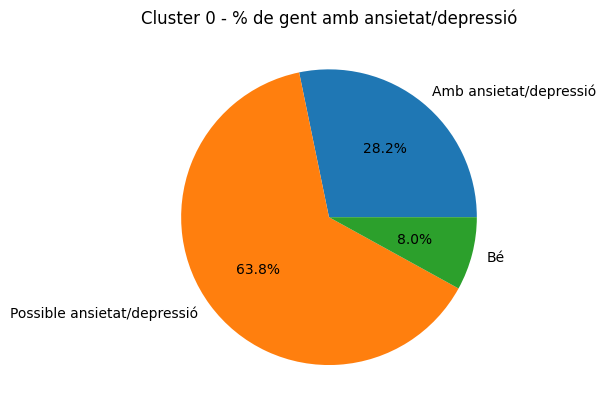

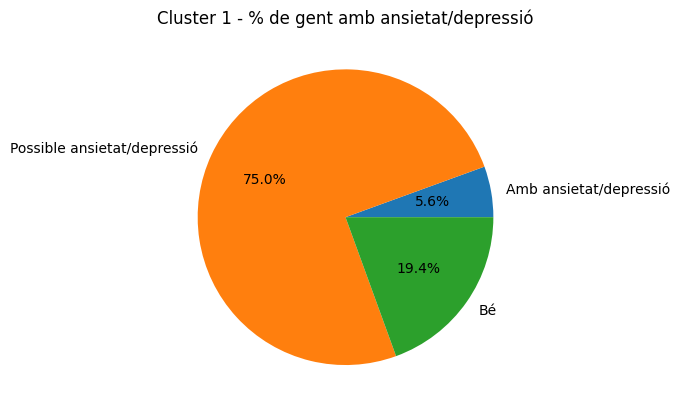

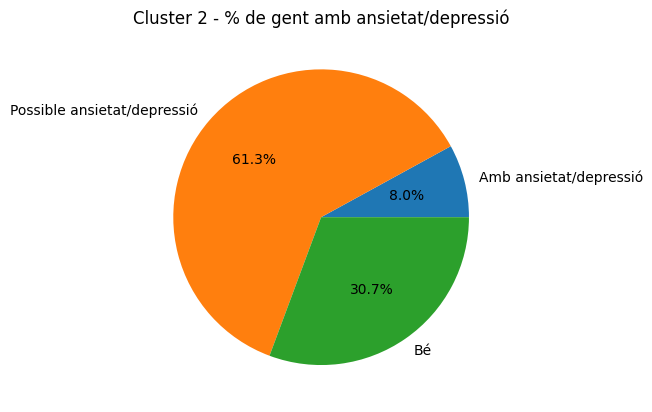

In [167]:
labels = 'Amb ansietat/depressió', 'Possible ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    dades.append([count_by_cluster1[c], count_by_cluster2[c], count_by_cluster3[c]])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

**Conclusions**

Recordem que quan hem treballat amb dos clusters i amb les característiques amb els coeficients calculats amb Linear Regression:
* Cluster 0: 35.2%
* Cluster 1: 15.9%

Ara treballant amb 3 clusters:

|  Cluster  | depressió/ansietat   | possible depressió/ansietat | bé |
|----|-----------| ---------------|-------------|
| 0  | 28.2%      | 63.8% | 8.0%    |
| 1  | 5.6%  | 75.5% | 19.4%    |
| 2  | 8.0%    | 61.3% | 30.7%    |

Veient aquests resultats podem, no amb gaire certesa, dir que el clúster 0 té tendència a tenir depressió o ansietat. Mentre que els altres dos clusters no es diferencien massa entre ells. No obstant, el cluster 2 sembla que tingui més proporció d'estudiants amb persones sanes, psicològicament.

### Provem reduir caract

In [168]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [169]:
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex']]

In [170]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_grups = 3
model_gm = GaussianMixture(n_components=n_grups)
clusters = model_gm.fit_predict(X_lr)

In [171]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 

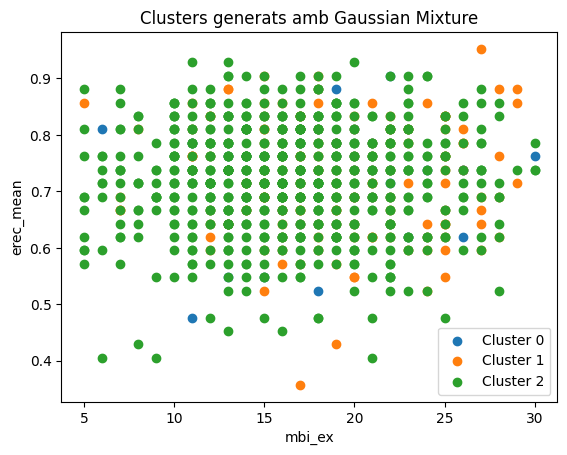

In [172]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

In [173]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

         psyt       sex  erec_mean     mbi_ex
cluster                                      
0         1.0  1.057143   0.721088  18.228571
1         1.0  2.000000   0.720674  18.689024
2         0.0  1.655022   0.719970  16.377001


In [174]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0     35
1    164
2    687
dtype: int64

#### Avaluació

In [175]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y

In [176]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold1 = df_aval[df_aval['target'] < threshold1]
df_target_gt_threshold2 = df_aval[(df_aval['target'] > threshold1) & (df_aval['target'] < threshold2)]
df_target_gt_threshold3 = df_aval[df_aval['target'] > threshold2]

# Fem el recompte agrupant per 'cluster'
count_by_cluster1 = df_target_gt_threshold1.groupby('cluster').size()
count_by_cluster2 = df_target_gt_threshold2.groupby('cluster').size()
count_by_cluster3 = df_target_gt_threshold3.groupby('cluster').size()

# Mostrem els resultats
print("Recompte estudiants que NO necessiten ajuda\n", count_by_cluster1)
print("\nRecompte estudiants recomanable rebre ajuda\n", count_by_cluster2)
print("\nRecompte estudiants que SÍ necessiten ajuda\n", count_by_cluster3)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que NO necessiten ajuda
 cluster
0      2
1     13
2    194
dtype: int64

Recompte estudiants recomanable rebre ajuda
 cluster
0     26
1    101
2    438
dtype: int64

Recompte estudiants que SÍ necessiten ajuda
 cluster
0     7
1    50
2    55
dtype: int64

Recompte estudiants totals en cluster
 cluster
0     35
1    164
2    687
dtype: int64


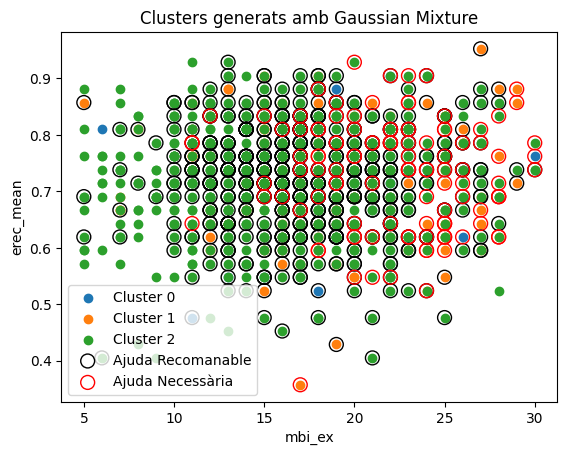

In [178]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold2['mbi_ex'], df_target_gt_threshold2['erec_mean'], label='Ajuda Recomanable', facecolors='none', edgecolors='black', marker='o', s=100)
plt.scatter(df_target_gt_threshold3['mbi_ex'], df_target_gt_threshold3['erec_mean'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

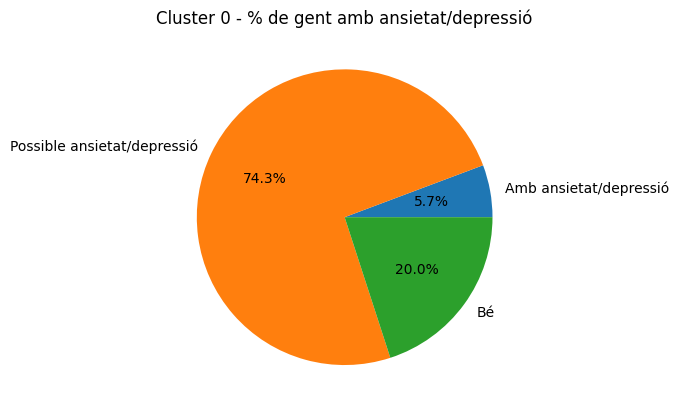

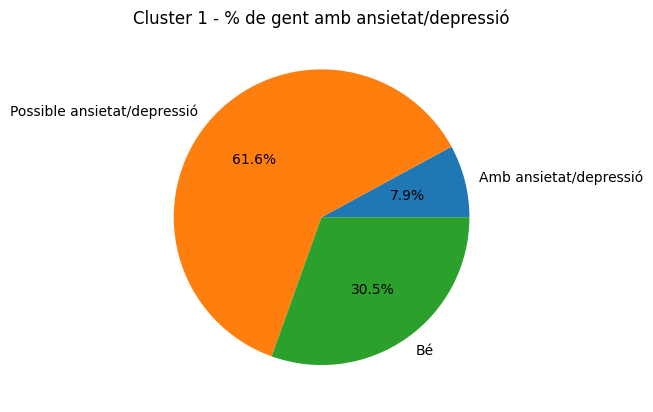

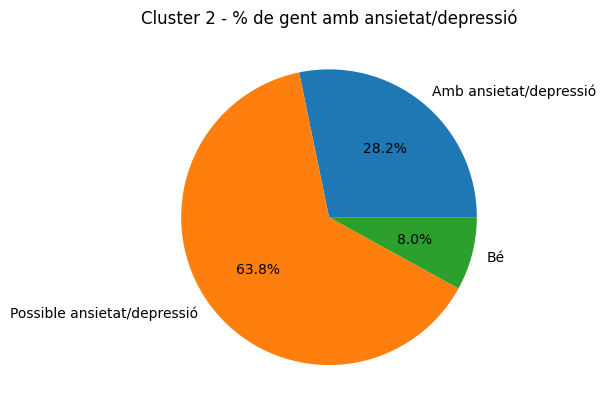

In [179]:
labels = 'Amb ansietat/depressió', 'Possible ansietat/depressió', 'Bé'
dades = []
for c in range(n_grups):
    dades.append([count_by_cluster1[c], count_by_cluster2[c], count_by_cluster3[c]])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

Abans treballant amb 3 clusters i amb la primera reducció de característiques:

|  Cluster  | depressió/ansietat   | possible depressió/ansietat | bé |
|----|-----------| ---------------|-------------|
| 0  | 28.2%      | 63.8% | 8.0%    |
| 1  | 5.6%  | 75.5% | 19.4%    |
| 2  | 8.0%    | 61.3% | 30.7%    |

Ara amb la segona reducció tenim:
|  Cluster  | depressió/ansietat   | possible depressió/ansietat | bé |
|----|-----------| ---------------|-------------|
| 0  | 5.7%      | 74.3% | 20.0%    |
| 1  | 7.9%  | 61.6% | 30.5%    |
| 2  |  28.2%      | 63.8% | 8.0%    |


In [ ]:
# tenint en compte que TP són els estudiants amb ansietat/depressió classificats correctament
TP = 43
TN = 712 - 136
FP = 136
FN = 174 - 43

acc = (TP + TN)/(sum(total_cluster))
print(acc)